In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Confirmed Cases

In [158]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_confirmed = df_confirmed.iloc[:,1:]
df_confirmed = df_confirmed.groupby("Country/Region").sum().reset_index().drop(["Lat", "Long"], axis = 1)
print(df_confirmed.shape)
df_confirmed.head(10)

(188, 256)


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290
1,Albania,0,0,0,0,0,0,0,0,0,...,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965
2,Algeria,0,0,0,0,0,0,0,0,0,...,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847
3,Andorra,0,0,0,0,0,0,0,0,0,...,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110
4,Angola,0,0,0,0,0,0,0,0,0,...,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,97,97,98,98,101,101,101,101,101,106
6,Argentina,0,0,0,0,0,0,0,0,0,...,664799,678266,691235,702484,711325,723132,736609,751001,765002,779689
7,Armenia,0,0,0,0,0,0,0,0,0,...,47877,48251,48643,49072,49400,49574,49901,50359,50850,51382
8,Australia,0,0,0,0,4,5,5,6,9,...,26980,27000,27016,27040,27044,27055,27078,27096,27109,27121
9,Austria,0,0,0,0,0,0,0,0,0,...,39984,40816,41500,42214,42876,43432,44041,44813,45686,46374


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Confirmed Cases by Country')

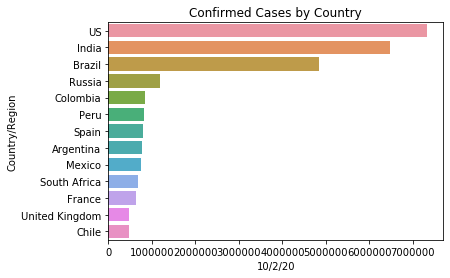

In [159]:
top = 13
temp_conf = df_confirmed.sort_values("10/2/20", ascending = False)
ax = sns.barplot(temp_conf.head(top)["10/2/20"], temp_conf.head(top)["Country/Region"])
plt.title("Confirmed Cases by Country")

## Confirme

In [160]:
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
df_deaths = df_deaths.iloc[:,1:]
df_deaths = df_deaths.groupby("Country/Region").sum().reset_index().drop(["Lat", "Long"], axis = 1)
print(df_deaths.shape)
df_deaths.head(10)

(188, 256)


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1446,1451,1451,1453,1453,1455,1458,1458,1458,1458
1,Albania,0,0,0,0,0,0,0,0,0,...,370,370,373,375,377,380,384,387,388,389
2,Algeria,0,0,0,0,0,0,0,0,0,...,1698,1703,1707,1711,1714,1719,1726,1736,1741,1749
3,Andorra,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,Angola,0,0,0,0,0,0,0,0,0,...,159,162,167,171,174,176,179,183,185,189
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,Argentina,0,0,0,0,0,0,0,0,0,...,14376,14766,15208,15543,15749,16113,16519,16937,20288,20599
7,Armenia,0,0,0,0,0,0,0,0,0,...,942,945,947,948,951,957,958,959,963,966
8,Australia,0,0,0,0,0,0,0,0,0,...,861,869,870,872,875,882,886,888,890,893
9,Austria,0,0,0,0,0,0,0,0,0,...,777,783,786,787,787,790,796,799,802,803


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Deaths by Country')

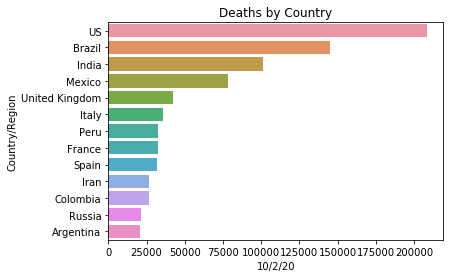

In [161]:
top = 13
temp_deaths = df_deaths.sort_values("10/2/20", ascending = False)
ax = sns.barplot(temp_deaths.head(top)["10/2/20"], temp_deaths.head(top)["Country/Region"])
plt.title("Deaths by Country")

In [162]:
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df_recovered = df_recovered.iloc[:,1:]
df_recovered = df_recovered.groupby("Country/Region").sum().reset_index().drop(["Lat", "Long"], axis = 1)
print(df_recovered.shape)
df_recovered.head(10)

(188, 256)


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,32610,32619,32619,32635,32642,32642,32746,32789,32842,32842
1,Albania,0,0,0,0,0,0,0,0,0,...,7139,7239,7309,7397,7397,7629,7732,7847,8077,8342
2,Algeria,0,0,0,0,0,0,0,0,0,...,35428,35544,35654,35756,35860,35962,36063,36174,36282,36385
3,Andorra,0,0,0,0,0,0,0,0,0,...,1203,1203,1263,1263,1263,1265,1265,1432,1432,1540
4,Angola,0,0,0,0,0,0,0,0,0,...,1473,1503,1554,1639,1707,1813,1833,1941,2082,2215
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,94
6,Argentina,0,0,0,0,0,0,0,0,0,...,525486,536589,546924,556489,565935,576715,585857,594645,603140,614515
7,Armenia,0,0,0,0,0,0,0,0,0,...,43026,43266,43401,43576,43613,43665,43849,44001,44219,44406
8,Australia,0,0,0,0,0,0,0,0,2,...,24446,24521,24521,24571,24631,24679,24750,24782,24786,24848
9,Austria,0,0,0,0,0,0,0,0,0,...,30949,31661,32301,33154,33589,34052,34916,35644,36476,37186


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recoveries by Country')

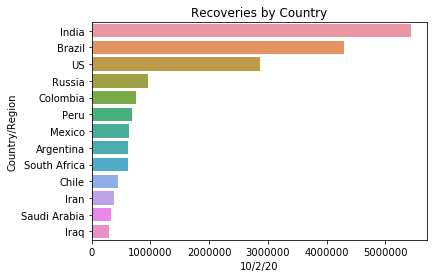

In [163]:
top = 13
temp_recov = df_recovered.sort_values("10/2/20", ascending = False)
ax = sns.barplot(temp_recov.head(top)["10/2/20"], temp_recov.head(top)["Country/Region"])
plt.title("Recoveries by Country")

In [194]:
df_mortality_rate = (df_deaths.iloc[:,1:] / df_confirmed.iloc[:,1:]) * 100
dates = list(df_confirmed.iloc[:,1:].columns)
df_mortality_rate["Country/Region"] = df_deaths["Country/Region"]
df_mortality_rate = df_mortality_rate.fillna(0)
df_mortality_rate.head(10)
df_mortality_rate.reindex(["Country/Region"] + dates, axis = 1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.693958,3.704366,3.702853,3.707389,3.704081,3.708613,3.714271,3.712947,3.711340,3.710868
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.893564,2.863555,2.859333,2.851061,2.843352,2.837727,2.840657,2.835373,2.810372,2.785535
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.369048,3.367010,3.363282,3.360569,3.356375,3.356570,3.360069,3.368911,3.368156,3.373387
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.023388,3.023388,2.886710,2.886710,2.886710,2.695829,2.695829,2.585366,2.585366,2.511848
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.644281,3.620112,3.638344,3.660103,3.688003,3.668960,3.649337,3.680611,3.617521,3.626943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.733490,0.728898,0.732292,0.745040,0.751880,0.764295,0.773880,0.779468,0.788651,0.787421
184,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
185,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.881222,28.881222,28.930508,28.916256,28.916256,28.902019,28.902019,28.859390,28.788622,28.872549
186,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.298691,2.291077,2.287289,2.272105,2.267605,2.264666,2.256201,2.249475,2.249696,2.245448


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mortality Rates by Country')

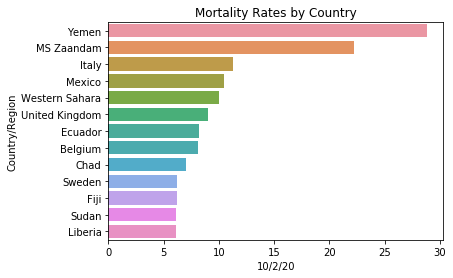

In [195]:
top = 13
temp_mort = df_mortality_rate.sort_values("10/2/20", ascending = False)
ax = sns.barplot(temp_mort.head(top)["10/2/20"], temp_mort.head(top)["Country/Region"])
plt.title("Mortality Rates by Country")

In [197]:
df_recovery_rate = (df_recovered.iloc[:,1:] / df_confirmed.iloc[:,1:]) * 100
dates = list(df_confirmed.iloc[:,1:].columns)
df_recovery_rate["Country/Region"] = df_deaths["Country/Region"]
df_recovery_rate = df_recovery_rate.fillna(0)
df_recovery_rate = df_recovery_rate.reindex(["Country/Region"] + dates, axis = 1)
df_recovery_rate.head(10)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,83.305658,83.275466,83.241464,83.269545,83.213093,83.200367,83.420798,83.500560,83.599338,83.588699
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,55.830140,56.025075,56.029130,56.238121,55.788521,56.971100,57.197810,57.491391,58.503549,59.735052
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,70.293651,70.274224,70.248650,70.228228,70.221474,70.220452,70.205186,70.199884,70.191526,70.177638
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,68.625214,68.625214,68.790850,68.790850,68.790850,64.343845,64.343845,69.853659,69.853659,72.985782
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,33.761174,33.586592,33.856209,35.081336,36.180585,37.794455,37.370031,39.038616,40.711772,42.506237
5,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,94.845361,94.845361,93.877551,93.877551,91.089109,91.089109,91.089109,91.089109,91.089109,88.679245
6,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,79.044343,79.111882,79.122730,79.217320,79.560679,79.752383,79.534326,79.180321,78.841624,78.815399
7,Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,89.867786,89.668608,89.223527,88.800130,88.285425,88.080445,87.871987,87.374650,86.959685,86.423261
8,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.222222,...,90.607858,90.818519,90.764732,90.869083,91.077503,91.217889,91.402615,91.459994,91.430890,91.619041
9,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,77.403461,77.570071,77.833735,78.537926,78.339864,78.403021,79.280670,79.539419,79.840651,80.187174


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recovery Rates by Country')

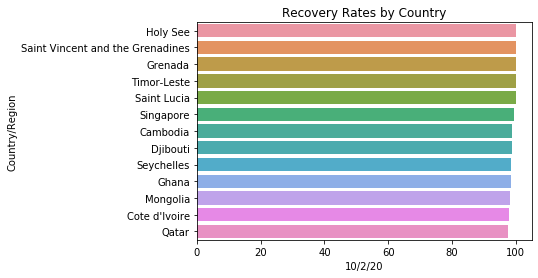

In [198]:
top = 13
temp_recov = df_recovery_rate.sort_values("10/2/20", ascending = False)
ax = sns.barplot(temp_recov.head(top)["10/2/20"], temp_recov.head(top)["Country/Region"])
plt.title("Recovery Rates by Country")